In [214]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib widget

In [140]:
def cartesian_to_spherical(vector)-> tuple:
    """
    Convert a 3D Cartesian vector to spherical coordinates.

    Parameters:
    vector (numpy array): 3D Cartesian vector [x, y, z]

    Returns:
    r (float): radial distance
    phi (float): azimuthal angle (in radians)
    theta (float): polar angle (in radians)
    """
    x, y, z = vector
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return r, phi, theta

def x_rot(gamma)-> np.ndarray:
    return np.array([[1, 0, 0], 
                     [0, np.cos(gamma), -np.sin(gamma)], 
                     [0, np.sin(gamma), np.cos(gamma)]])
                    
def y_rot(beta)-> np.ndarray:
    return np.array([[np.cos(beta), 0, np.sin(beta)], 
                     [0, 1, 0], 
                     [-np.sin(beta), 0, np.cos(beta)]])
                    
def z_rot(alpha)-> np.ndarray:
    return np.array([[np.cos(alpha), -np.sin(alpha), 0], 
                     [np.sin(alpha), np.cos(alpha), 0], 
                     [0, 0, 1]])

def boost(v)-> np.ndarray:
    beta = np.sqrt(np.dot(v, v))
    gamma = 1 / np.sqrt(1 - beta**2)
    return np.array([[gamma, -gamma * v[0], -gamma * v[1], -gamma * v[2]],
                     [-gamma * v[0], 1 + gamma**2/(1+gamma) * v[0]**2,gamma**2/(1+gamma) * v[0] * v[1], gamma**2/(1+gamma) * v[0] * v[2]],
                     [-gamma * v[1], gamma**2/(1+gamma) * v[1] * v[0], 1 + gamma**2/(1+gamma) * v[1]**2, gamma**2/(1+gamma) * v[1] * v[2]],
                     [-gamma * v[2], gamma**2/(1+gamma) * v[2] * v[0], gamma**2/(1+gamma) * v[2] * v[1], 1 + gamma**2/(1+gamma) * v[2]**2]
                     ]
                    )

1.7320508075688772 0.7853981633974483 0.9553166181245092
[0.00000000e+00 1.11022302e-16 1.73205081e+00]
[0.00000000e+00 3.70074342e-17 5.77350269e-01]
[[ 1.22474487e+00 -0.00000000e+00 -4.53246652e-17 -7.07106781e-01]
 [-0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.53246652e-17  0.00000000e+00  1.00000000e+00  1.44058667e-17]
 [-7.07106781e-01  0.00000000e+00  1.44058667e-17  1.22474487e+00]]
[nan nan nan]


/tmp/ipykernel_207489/4067373942.py:36: RuntimeWarning: invalid value encountered in sqrt
  gamma = 1 / np.sqrt(1 - beta**2)


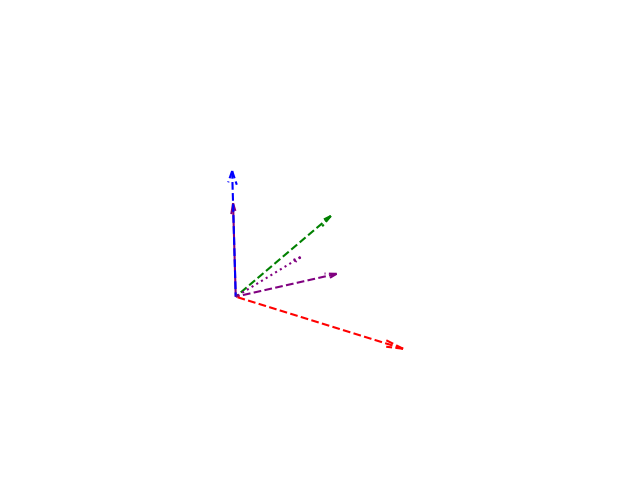

In [163]:
plt.close('all')

vector = np.array([1, 1, 1])

r, phi, theta = cartesian_to_spherical(vector)

print(r,phi,theta)

# Define the rotation matrices
e_x = np.array([1,0,0])
e_y = np.array([0,1,0])
e_z = np.array([0,0,1])

vector1 = z_rot(-phi) @ vector

vector2 = y_rot(-theta) @ vector1

print(vector2)
lv = np.append(3,vector2)
v = lv[1:] / lv[0]
print(v)
print(boost(v))
vector3 = (boost(lv[1:]) @ lv)[1:]
print(vector3)
inv_tot_rot = (y_rot(-theta) @ z_rot(-phi)).mT

vector4 = inv_tot_rot @ vector3

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 4)
ax.set_ylim3d(-1, 4)
ax.set_zlim3d(-1, 4)

# Plot the vector
ax.quiver(0,0,0,*vector, arrow_length_ratio=0.1, color='purple',ls=":")
ax.quiver(0,0,0,*vector1, length=np.sqrt(np.dot(vector1,vector1)), arrow_length_ratio=0.1, color='purple', ls='--')
ax.quiver(0,0,0,*vector2, length=np.sqrt(np.dot(vector2,vector2)), arrow_length_ratio=0.1, color='purple', ls='-')
ax.quiver(0,0,0,*vector3, length=np.sqrt(np.dot(vector3,vector3)), arrow_length_ratio=0.1, color='orange', ls='-')
ax.quiver(0,0,0,*vector4, length=np.sqrt(np.dot(vector4,vector4)), arrow_length_ratio=0.1, color='orange', ls='--')
# Draw axes through the origin
origin = np.zeros(3)
ax.quiver(*origin,*e_x,length=4,arrow_length_ratio=0.1, color='r', ls='--')
ax.quiver(*origin,*e_y,length=4,arrow_length_ratio=0.1, color='g', ls='--')
ax.quiver(*origin,*e_z,length=4,arrow_length_ratio=0.1, color='b', ls='--')


ax.grid(False)
ax.axis('off')

# Show the plot
plt.show()

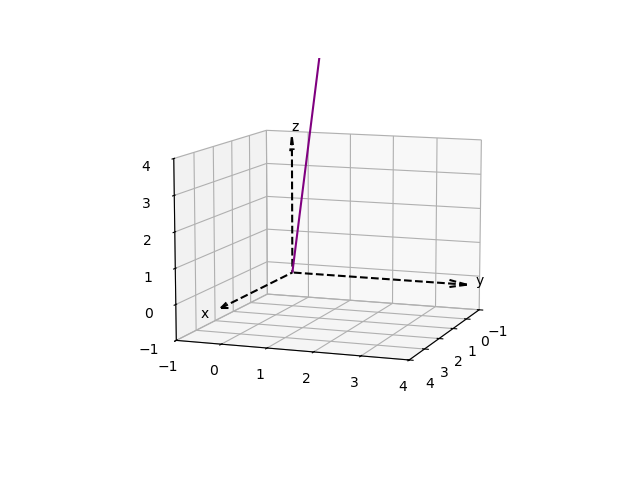

In [ ]:
plt.close('all')



vector1 = z_rot(-theta) @ vector

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 4)
ax.set_ylim3d(-1, 4)
ax.set_zlim3d(-1, 4)

# Plot the vector
ax.quiver(0,0,0,*vector, length=np.sqrt(np.dot(vector,vector)), arrow_length_ratio=0.1, color='purple',ls="-")
ax.plot3D([vector[0],vector[0]],[vector[1],vector[1]],[0,vector[2]], color='purple', ls='--')

# Draw axes through the origin
origin = np.zeros(3)
ax.quiver(*origin,*e_x,length=4,arrow_length_ratio=0.1, color='r', ls='--')
ax.quiver(*origin,*e_y,length=4,arrow_length_ratio=0.1, color='g', ls='--')
ax.quiver(*origin,*e_z,length=4,arrow_length_ratio=0.1, color='b', ls='--')

def run(i, steps):
    ax.clear()
    ax.set_xlim3d(-1, 4)
    ax.set_ylim3d(-1, 4)
    ax.set_zlim3d(-1, 4)
    vector1 = z_rot(-theta * i/steps) @ vector
    ax.quiver(0,0,0,*vector1, length=np.sqrt(np.dot(vector1,vector1)), arrow_length_ratio=0.1, color='purple', ls='-')
    ax.quiver(*origin,*e_x,length=4,arrow_length_ratio=0.1, color='k', ls='--')
    ax.quiver(*origin,*e_y,length=4,arrow_length_ratio=0.1, color='k', ls='--')
    ax.quiver(*origin,*e_z,length=4,arrow_length_ratio=0.1, color='k', ls='--')
    ax.text(0, 0, 4.2, "z",)
    ax.text(0, 4.2, 0, "y",)
    ax.text(5, 0, 0, "x",)
    # ax.grid(False)
    # ax.axis('off')
    ax.view_init(elev=10, azim=20)
    return ax

ax.grid(False)
ax.axis('off')

ani = animation.FuncAnimation(fig, run, 100, fargs=(100,), repeat=False)
ani.save('rotation.mp4', fps=20, dpi=300)

# Show the plot
plt.show()

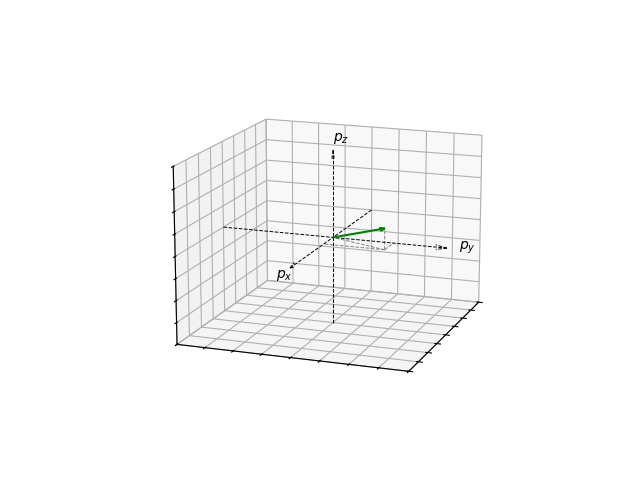

In [100]:
plt.close("all")

# E, px, py, pz
lv_pip = np.array([0.7037460788850690, 0.0138229757298888, 0.5010979958640546, 0.0158520377273281])
lv_pim = np.array([0.7977278889391801, 0.2234089946365893, 0.5333302071904471, 0.2414541688934450])
lv_Kp = np.array([1.3818453429508930, -0.6326102265449011, -1.1562201638395961, 0.3911213265367482])
lv_Km = np.array([0.8029967090807248, 0.4359269130956424, 0.1217919607850945, -0.6484275331575213])

p_pip = lv_pip[1:]
p_pim = lv_pim[1:]
p_Kp = lv_Kp[1:]
p_Km = lv_Km[1:]

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

# Plot the vector
ax.quiver(0,0,0,*p_pim, arrow_length_ratio=0.1, color='g',ls="-")
ax.plot3D([p_pim[0],p_pim[0]],[p_pim[1],p_pim[1]],[0,p_pim[2]], color='gray', ls='--', lw=0.7)
ax.plot3D([p_pim[0],0],[p_pim[1],0],[0,0], color='gray', ls='--', lw=0.7)
ax.plot3D([p_pim[0],0],[p_pim[1],p_pim[1]],[0,0], color='gray', ls='--', lw=0.7)
ax.plot3D([p_pim[0],p_pim[0]],[p_pim[1],0],[0,0], color='gray', ls='--', lw=0.7)

# Draw axes through the origin
origin = np.zeros(3)
ax.quiver(*origin,*e_x,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_y,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_z,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_x,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_y,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_z,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.text(0, 0, 1.1, "$p_z$",)
ax.text(0, 1.1, 0, "$p_y$",)
ax.text(1.3, 0, 0, "$p_x$",)
ax.view_init(elev=15, azim=20)
ax.tick_params(which="both",labelbottom=False, labelleft=False, labelright=False, labeltop=False)
# Show the plot
plt.show()

[[ 1.00006050e+00 -1.10004433e-02 -3.01192353e-17  7.52980883e-18]
 [-1.10004433e-02  1.00006050e+00  1.65657458e-19 -4.14143646e-20]
 [-3.01192353e-17  1.65657458e-19  1.00000000e+00 -1.13392612e-34]
 [ 7.52980883e-18 -4.14143646e-20 -1.13392612e-34  1.00000000e+00]]
[ 5.55111512e-17 -1.11022302e-16 -1.08856313e+00]
[-1.11022302e-16  2.77555756e-17  1.08856313e+00]


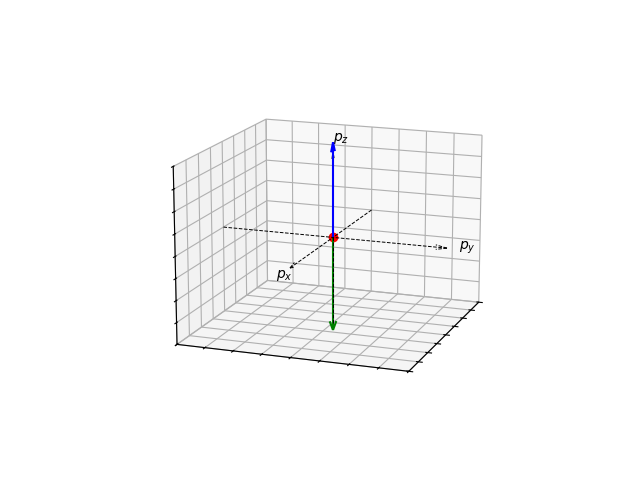

In [ ]:
plt.close("all")

# E, px, py, pz
lv_pip = np.array([0.7037460788850690, 0.0138229757298888, 0.5010979958640546, 0.0158520377273281])
lv_pim = np.array([0.7977278889391801, 0.2234089946365893, 0.5333302071904471, 0.2414541688934450])
lv_Kp = np.array([1.3818453429508930, -0.6326102265449011, -1.1562201638395961, 0.3911213265367482])
lv_Km = np.array([0.8029967090807248, 0.4359269130956424, 0.1217919607850945, -0.6484275331575213])
lv_phi = lv_Kp + lv_Km

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim
p_cms = lv_cms[1:]
v_cms = p_cms / lv_cms[0]
boost_to_cms = boost(v_cms)

print(boost_to_cms)

lv_Kp = boost_to_cms @ lv_Kp
lv_Km = boost_to_cms @ lv_Km
lv_phi = lv_Kp + lv_Km

lv_pip = boost_to_cms @ lv_pip
lv_pim = boost_to_cms @ lv_pim
lv_X1 = lv_pip + lv_pim

p_pip = lv_pip[1:]
p_pim = lv_pim[1:]
p_Kp = lv_Kp[1:]
p_Km = lv_Km[1:]

p_phi = lv_phi[1:]
p_X1 = lv_X1[1:]

r, phi, theta = cartesian_to_spherical(p_phi)
p_phi_rot = y_rot(-theta) @ z_rot(-phi) @ p_phi
p_X1_rot = y_rot(-theta) @ z_rot(-phi) @ p_X1

lv_phi_rot = np.append(lv_phi[0],p_phi_rot)
lv_X1_rot = np.append(lv_X1[0],p_X1_rot)

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

ax.plot3D(0,0,0, marker='o', color='r')

# ax.quiver(0,0,0,*p_pip, arrow_length_ratio=0.1, color='g',ls="-")
# ax.quiver(0,0,0,*p_pim, arrow_length_ratio=0.1, color='g',ls="-")
ax.quiver(0,0,0,*p_X1_rot, arrow_length_ratio=0.1, color='g',ls="-")

# ax.quiver(0,0,0,*p_Kp, arrow_length_ratio=0.1, color='b',ls="--")
# ax.quiver(0,0,0,*p_Km, arrow_length_ratio=0.1, color='b',ls="--")
ax.quiver(0,0,0,*p_phi_rot, arrow_length_ratio=0.1, color='b',ls="-")

# Draw axes through the origin
origin = np.zeros(3)
ax.quiver(*origin,*e_x,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_y,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_z,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_x,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_y,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_z,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.text(0, 0, 1.1, "$p_z$",)
ax.text(0, 1.1, 0, "$p_y$",)
ax.text(1.3, 0, 0, "$p_x$",)
ax.view_init(elev=15, azim=20)
ax.tick_params(which="both",labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Show the plot
plt.show()

[[ 1.00006050e+00 -1.10004433e-02 -3.01192353e-17  7.52980883e-18]
 [-1.10004433e-02  1.00006050e+00  1.65657458e-19 -4.14143646e-20]
 [-3.01192353e-17  1.65657458e-19  1.00000000e+00 -1.13392612e-34]
 [ 7.52980883e-18 -4.14143646e-20 -1.13392612e-34  1.00000000e+00]]


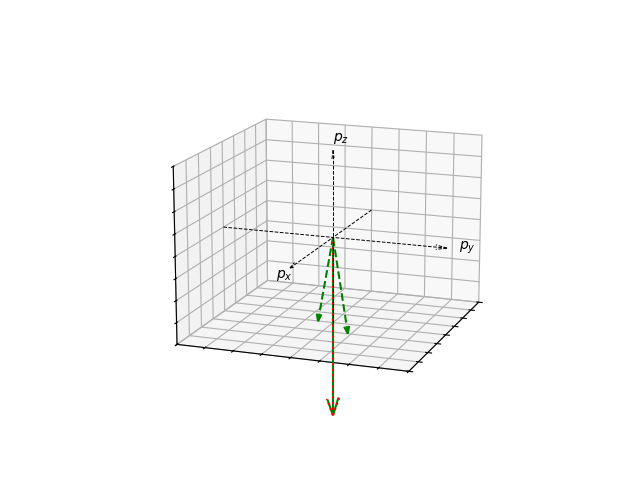

In [212]:
plt.close("all")

# E, px, py, pz
lv_pip = np.array([0.7037460788850690, 0.0138229757298888, 0.5010979958640546, 0.0158520377273281])
lv_pim = np.array([0.7977278889391801, 0.2234089946365893, 0.5333302071904471, 0.2414541688934450])
lv_Kp = np.array([1.3818453429508930, -0.6326102265449011, -1.1562201638395961, 0.3911213265367482])
lv_Km = np.array([0.8029967090807248, 0.4359269130956424, 0.1217919607850945, -0.6484275331575213])
lv_phi = lv_Kp + lv_Km

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim
p_cms = lv_cms[1:]
v_cms = p_cms / lv_cms[0]
boost_to_cms = boost(v_cms)

print(boost_to_cms)

lv_Kp = boost_to_cms @ lv_Kp
lv_Km = boost_to_cms @ lv_Km
lv_phi = lv_Kp + lv_Km

lv_pip = boost_to_cms @ lv_pip
lv_pim = boost_to_cms @ lv_pim
lv_X1 = lv_pip + lv_pim

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim

p_pip = lv_pip[1:]
p_pim = lv_pim[1:]
p_Kp = lv_Kp[1:]
p_Km = lv_Km[1:]

p_phi = lv_phi[1:]
p_X1 = lv_X1[1:]

r, phi, theta = cartesian_to_spherical(p_phi)
p_phi_rot = y_rot(-theta) @ z_rot(-phi) @ p_phi
p_X1_rot = y_rot(-theta) @ z_rot(-phi) @ p_X1
p_pip_rot = y_rot(-theta) @ z_rot(-phi) @ p_pip
p_pim_rot = y_rot(-theta) @ z_rot(-phi) @ p_pim

lv_phi_rot = np.append(lv_phi[0],p_phi_rot)
lv_X1_rot = np.append(lv_X1[0],p_X1_rot)
lv_pip_rot = np.append(lv_pip[0],p_pip_rot)
lv_pim_rot = np.append(lv_pim[0],p_pim_rot)

boost_to_phi = boost(p_phi_rot / lv_phi_rot[0])
lv_phi_rot = boost_to_phi @ lv_phi_rot
lv_X1_rot = boost_to_phi @ lv_X1_rot
lv_cms = boost_to_phi @ lv_cms
lv_pip_rot = boost_to_phi @ lv_pip_rot
lv_pim_rot = boost_to_phi @ lv_pim_rot

p_phi_rot = lv_phi_rot[1:]
p_X1_rot = lv_X1_rot[1:]
p_cms = lv_cms[1:]
p_pip_rot = lv_pip_rot[1:]
p_pim_rot = lv_pim_rot[1:]

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)


ax.quiver(0,0,0,*p_pip_rot, arrow_length_ratio=0.1, color='g',ls="--")
ax.quiver(0,0,0,*p_pim_rot, arrow_length_ratio=0.1, color='g',ls="--")
ax.quiver(0,0,0,*p_X1_rot, arrow_length_ratio=0.1, color='g',ls="-")

# ax.quiver(0,0,0,*p_Kp, arrow_length_ratio=0.1, color='b',ls="--")
# ax.quiver(0,0,0,*p_Km, arrow_length_ratio=0.1, color='b',ls="--")
ax.quiver(0,0,0,*p_phi_rot, arrow_length_ratio=0.1, color='b',ls="-")

ax.quiver(0,0,0,*p_cms, arrow_length_ratio=0.1, color='r',ls=":")

# Draw axes through the origin
origin = np.zeros(3)
ax.quiver(*origin,*e_x,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_y,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_z,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_x,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_y,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_z,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.text(0, 0, 1.1, "$p_z$",)
ax.text(0, 1.1, 0, "$p_y$",)
ax.text(1.3, 0, 0, "$p_x$",)
ax.view_init(elev=15, azim=20)
ax.tick_params(which="both",labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Show the plot
plt.show()

[[ 1.00006050e+00 -1.10004433e-02 -3.01192353e-17  7.52980883e-18]
 [-1.10004433e-02  1.00006050e+00  1.65657458e-19 -4.14143646e-20]
 [-3.01192353e-17  1.65657458e-19  1.00000000e+00 -1.13392612e-34]
 [ 7.52980883e-18 -4.14143646e-20 -1.13392612e-34  1.00000000e+00]]


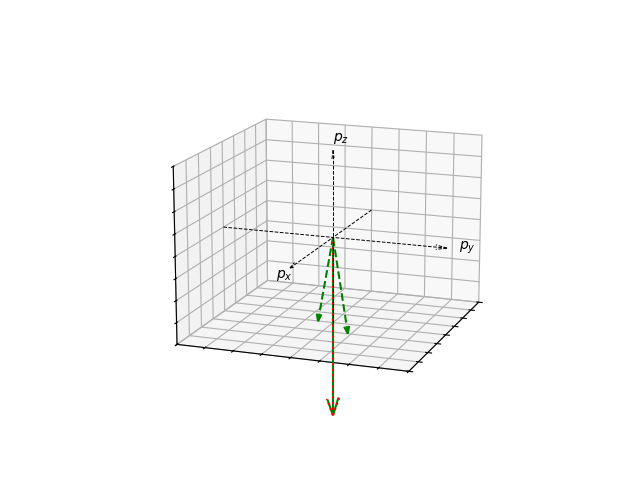

In [233]:
plt.close('all')

# E, px, py, pz
lv_pip = np.array([0.7037460788850690, 0.0138229757298888, 0.5010979958640546, 0.0158520377273281])
lv_pim = np.array([0.7977278889391801, 0.2234089946365893, 0.5333302071904471, 0.2414541688934450])
lv_Kp = np.array([1.3818453429508930, -0.6326102265449011, -1.1562201638395961, 0.3911213265367482])
lv_Km = np.array([0.8029967090807248, 0.4359269130956424, 0.1217919607850945, -0.6484275331575213])
lv_phi = lv_Kp + lv_Km

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim
p_cms = lv_cms[1:]
v_cms = p_cms / lv_cms[0]
boost_to_cms = boost(v_cms)

print(boost_to_cms)

lv_Kp = boost_to_cms @ lv_Kp
lv_Km = boost_to_cms @ lv_Km
lv_phi = lv_Kp + lv_Km

lv_pip = boost_to_cms @ lv_pip
lv_pim = boost_to_cms @ lv_pim
lv_X1 = lv_pip + lv_pim

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim

p_pip = lv_pip[1:]
p_pim = lv_pim[1:]
p_Kp = lv_Kp[1:]
p_Km = lv_Km[1:]

p_phi = lv_phi[1:]
p_X1 = lv_X1[1:]

r, phi, theta = cartesian_to_spherical(p_phi)


# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def run(i, steps):

    stage_1 = steps / 2

    if i < stage_1:
        prog = i/(stage_1-1)
    else:
        prog = 1
    p_phi_rot = y_rot(-theta*prog) @ z_rot(-phi*prog) @ p_phi
    p_X1_rot = y_rot(-theta*prog) @ z_rot(-phi*prog) @ p_X1
    p_pip_rot = y_rot(-theta*prog) @ z_rot(-phi*prog) @ p_pip
    p_pim_rot = y_rot(-theta*prog) @ z_rot(-phi*prog) @ p_pim

    if i < stage_1:
        prog = 0
    else:
        prog = (i - stage_1)/(steps - stage_1 - 1)

    lv_phi_rot = np.append(lv_phi[0],p_phi_rot)
    lv_X1_rot = np.append(lv_X1[0],p_X1_rot)
    lv_pip_rot = np.append(lv_pip[0],p_pip_rot)
    lv_pim_rot = np.append(lv_pim[0],p_pim_rot)

    boost_to_phi = boost(p_phi_rot*prog / lv_phi_rot[0])
    lv_phi_rot = boost_to_phi @ lv_phi_rot
    lv_X1_rot = boost_to_phi @ lv_X1_rot
    lv_cms_rot = boost_to_phi @ lv_cms
    lv_pip_rot = boost_to_phi @ lv_pip_rot
    lv_pim_rot = boost_to_phi @ lv_pim_rot

    p_phi_rot = lv_phi_rot[1:]
    p_X1_rot = lv_X1_rot[1:]
    p_cms_rot = lv_cms_rot[1:]
    p_pip_rot = lv_pip_rot[1:]
    p_pim_rot = lv_pim_rot[1:]

    ax.clear()
    
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)

    ax.quiver(0,0,0,*p_pip_rot, arrow_length_ratio=0.1, color='g',ls="--")
    ax.quiver(0,0,0,*p_pim_rot, arrow_length_ratio=0.1, color='g',ls="--")
    ax.quiver(0,0,0,*p_X1_rot, arrow_length_ratio=0.1, color='g',ls="-")

    # ax.quiver(0,0,0,*p_Kp, arrow_length_ratio=0.1, color='b',ls="--")
    # ax.quiver(0,0,0,*p_Km, arrow_length_ratio=0.1, color='b',ls="--")
    ax.quiver(0,0,0,*p_phi_rot, arrow_length_ratio=0.1, color='b',ls="-")

    ax.quiver(0,0,0,*p_cms_rot, arrow_length_ratio=0.1, color='r',ls=":")

    # Draw axes through the origin
    origin = np.zeros(3)
    ax.quiver(*origin,*e_x,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
    ax.quiver(*origin,*e_y,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
    ax.quiver(*origin,*e_z,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
    ax.quiver(*origin,*-e_x,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
    ax.quiver(*origin,*-e_y,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
    ax.quiver(*origin,*-e_z,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
    ax.text(0, 0, 1.1, "$p_z$",)
    ax.text(0, 1.1, 0, "$p_y$",)
    ax.text(1.3, 0, 0, "$p_x$",)
    ax.view_init(elev=15, azim=20)
    ax.tick_params(which="both",labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    return ax

ax.grid(False)
ax.axis('off')

ani = animation.FuncAnimation(fig, run, 100, fargs=(100,), repeat=False)
ani.save('helicity.mp4', fps=20, dpi=300)

# Show the plot
plt.show()

[[ 1.00006050e+00 -1.10004433e-02 -3.01192353e-17  7.52980883e-18]
 [-1.10004433e-02  1.00006050e+00  1.65657458e-19 -4.14143646e-20]
 [-3.01192353e-17  1.65657458e-19  1.00000000e+00 -1.13392612e-34]
 [ 7.52980883e-18 -4.14143646e-20 -1.13392612e-34  1.00000000e+00]]


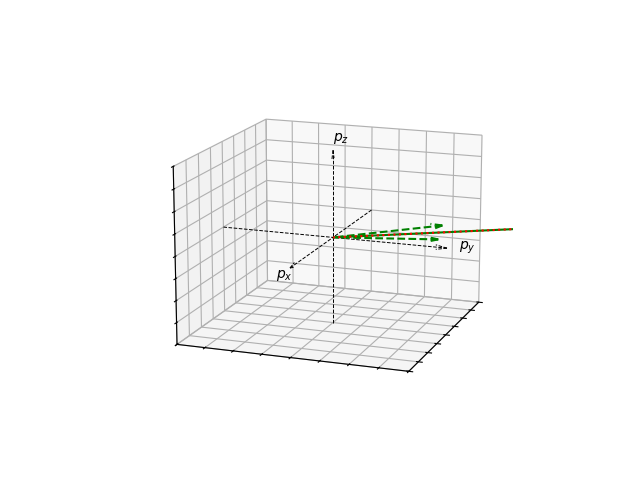

In [234]:
plt.close('all')

# E, px, py, pz
lv_pip = np.array([0.7037460788850690, 0.0138229757298888, 0.5010979958640546, 0.0158520377273281])
lv_pim = np.array([0.7977278889391801, 0.2234089946365893, 0.5333302071904471, 0.2414541688934450])
lv_Kp = np.array([1.3818453429508930, -0.6326102265449011, -1.1562201638395961, 0.3911213265367482])
lv_Km = np.array([0.8029967090807248, 0.4359269130956424, 0.1217919607850945, -0.6484275331575213])
lv_phi = lv_Kp + lv_Km

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim
p_cms = lv_cms[1:]
v_cms = p_cms / lv_cms[0]
boost_to_cms = boost(v_cms)

print(boost_to_cms)

lv_Kp = boost_to_cms @ lv_Kp
lv_Km = boost_to_cms @ lv_Km
lv_phi = lv_Kp + lv_Km

lv_pip = boost_to_cms @ lv_pip
lv_pim = boost_to_cms @ lv_pim
lv_X1 = lv_pip + lv_pim

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim

p_pip = lv_pip[1:]
p_pim = lv_pim[1:]
p_Kp = lv_Kp[1:]
p_Km = lv_Km[1:]

p_phi = lv_phi[1:]
p_X1 = lv_X1[1:]

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def run(i, steps):

    prog = i/(steps-1)
    
    boost_to_phi = boost(p_phi*prog / lv_phi[0])
    lv_phi_rot = boost_to_phi @ lv_phi
    lv_X1_rot = boost_to_phi @ lv_X1
    lv_cms_rot = boost_to_phi @ lv_cms
    lv_pip_rot = boost_to_phi @ lv_pip
    lv_pim_rot = boost_to_phi @ lv_pim

    p_phi_rot = lv_phi_rot[1:]
    p_X1_rot = lv_X1_rot[1:]
    p_cms_rot = lv_cms_rot[1:]
    p_pip_rot = lv_pip_rot[1:]
    p_pim_rot = lv_pim_rot[1:]

    ax.clear()
    
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)

    ax.quiver(0,0,0,*p_pip_rot, arrow_length_ratio=0.1, color='g',ls="--")
    ax.quiver(0,0,0,*p_pim_rot, arrow_length_ratio=0.1, color='g',ls="--")
    ax.quiver(0,0,0,*p_X1_rot, arrow_length_ratio=0.1, color='g',ls="-")

    # ax.quiver(0,0,0,*p_Kp, arrow_length_ratio=0.1, color='b',ls="--")
    # ax.quiver(0,0,0,*p_Km, arrow_length_ratio=0.1, color='b',ls="--")
    ax.quiver(0,0,0,*p_phi_rot, arrow_length_ratio=0.1, color='b',ls="-")

    ax.quiver(0,0,0,*p_cms_rot, arrow_length_ratio=0.1, color='r',ls=":")

    # Draw axes through the origin
    origin = np.zeros(3)
    ax.quiver(*origin,*e_x,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
    ax.quiver(*origin,*e_y,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
    ax.quiver(*origin,*e_z,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
    ax.quiver(*origin,*-e_x,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
    ax.quiver(*origin,*-e_y,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
    ax.quiver(*origin,*-e_z,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
    ax.text(0, 0, 1.1, "$p_z$",)
    ax.text(0, 1.1, 0, "$p_y$",)
    ax.text(1.3, 0, 0, "$p_x$",)
    ax.view_init(elev=15, azim=20)
    ax.tick_params(which="both",labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    return ax

ax.grid(False)
ax.axis('off')

ani = animation.FuncAnimation(fig, run, 100, fargs=(100,), repeat=False)
ani.save('canonical.mp4', fps=20, dpi=300)

# Show the plot
plt.show()

[[ 1.00006050e+00 -1.10004433e-02 -3.01192353e-17  7.52980883e-18]
 [-1.10004433e-02  1.00006050e+00  1.65657458e-19 -4.14143646e-20]
 [-3.01192353e-17  1.65657458e-19  1.00000000e+00 -1.13392612e-34]
 [ 7.52980883e-18 -4.14143646e-20 -1.13392612e-34  1.00000000e+00]]


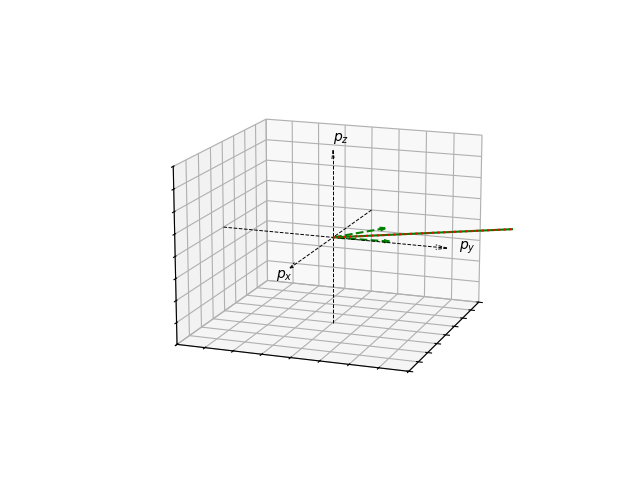

In [232]:
plt.close("all")

# E, px, py, pz
lv_pip = np.array([0.7037460788850690, 0.0138229757298888, 0.5010979958640546, 0.0158520377273281])
lv_pim = np.array([0.7977278889391801, 0.2234089946365893, 0.5333302071904471, 0.2414541688934450])
lv_Kp = np.array([1.3818453429508930, -0.6326102265449011, -1.1562201638395961, 0.3911213265367482])
lv_Km = np.array([0.8029967090807248, 0.4359269130956424, 0.1217919607850945, -0.6484275331575213])
lv_phi = lv_Kp + lv_Km

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim
p_cms = lv_cms[1:]
v_cms = p_cms / lv_cms[0]
boost_to_cms = boost(v_cms)

print(boost_to_cms)

lv_Kp = boost_to_cms @ lv_Kp
lv_Km = boost_to_cms @ lv_Km
lv_phi = lv_Kp + lv_Km

lv_pip = boost_to_cms @ lv_pip
lv_pim = boost_to_cms @ lv_pim
lv_X1 = lv_pip + lv_pim

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim

boost_1 = boost(lv_phi[1:] / lv_phi[0])
lv_phi_rot = boost_1 @ lv_phi
lv_X1_rot = boost_1 @ lv_X1
lv_cms = boost_1 @ lv_cms
lv_pip_rot = boost_1 @ lv_pip
lv_pim_rot = boost_1 @ lv_pim

p_phi = lv_phi_rot[1:]
p_X1 = lv_X1_rot[1:]
p_cms = lv_cms[1:]
p_pip_rot = lv_pip_rot[1:]
p_pim_rot = lv_pim_rot[1:]


# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)


ax.quiver(0,0,0,*p_pip, arrow_length_ratio=0.1, color='g',ls="--")
ax.quiver(0,0,0,*p_pim, arrow_length_ratio=0.1, color='g',ls="--")
ax.quiver(0,0,0,*p_X1, arrow_length_ratio=0.1, color='g',ls="-")

# ax.quiver(0,0,0,*p_Kp, arrow_length_ratio=0.1, color='b',ls="--")
# ax.quiver(0,0,0,*p_Km, arrow_length_ratio=0.1, color='b',ls="--")
ax.quiver(0,0,0,*p_phi, arrow_length_ratio=0.1, color='b',ls="-")

ax.quiver(0,0,0,*p_cms, arrow_length_ratio=0.1, color='r',ls=":")

# Draw axes through the origin
origin = np.zeros(3)
ax.quiver(*origin,*e_x,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_y,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_z,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_x,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_y,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_z,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.text(0, 0, 1.1, "$p_z$",)
ax.text(0, 1.1, 0, "$p_y$",)
ax.text(1.3, 0, 0, "$p_x$",)
ax.view_init(elev=15, azim=20)
ax.tick_params(which="both",labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Show the plot
plt.show()

[ 2.89077444 -0.21464715 -0.53333021 -0.24145417]


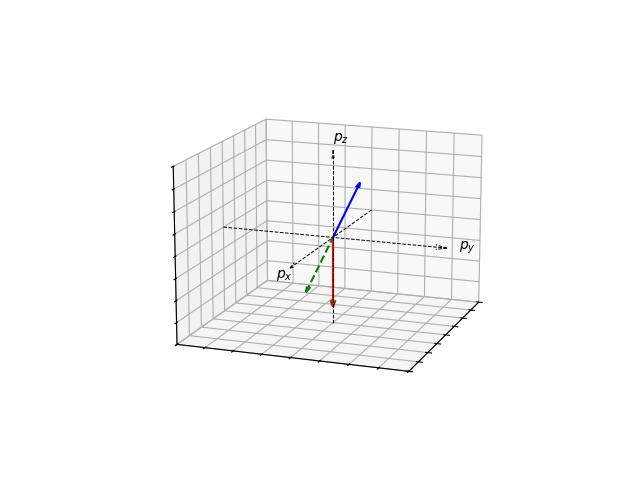

In [203]:
plt.close("all")

# E, px, py, pz
lv_pip = np.array([0.7037460788850690, 0.0138229757298888, 0.5010979958640546, 0.0158520377273281])
lv_pim = np.array([0.7977278889391801, 0.2234089946365893, 0.5333302071904471, 0.2414541688934450])
lv_Kp = np.array([1.3818453429508930, -0.6326102265449011, -1.1562201638395961, 0.3911213265367482])
lv_Km = np.array([0.8029967090807248, 0.4359269130956424, 0.1217919607850945, -0.6484275331575213])

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim
p_cms = lv_cms[1:]
v_cms = p_cms / lv_cms[0]
boost_to_cms = boost(v_cms)

lv_Kp = boost_to_cms @ lv_Kp
lv_Km = boost_to_cms @ lv_Km
lv_phi = lv_Kp + lv_Km

lv_pip = boost_to_cms @ lv_pip
lv_pim = boost_to_cms @ lv_pim
lv_X2p = lv_pip + lv_phi

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim

p_pip = lv_pip[1:]
p_pim = lv_pim[1:]
p_Kp = lv_Kp[1:]
p_Km = lv_Km[1:]

p_phi = lv_phi[1:]
p_X2p = lv_X2p[1:]
print(lv_X2p)

r, phi, theta = cartesian_to_spherical(p_X2p)
p_X2p_rot = y_rot(-theta) @ z_rot(-phi) @ p_X2p
p_phi_rot = y_rot(-theta) @ z_rot(-phi) @ p_phi
p_pip_rot = y_rot(-theta) @ z_rot(-phi) @ p_pip
p_pim_rot = y_rot(-theta) @ z_rot(-phi) @ p_pim

lv_phi_rot = np.append(lv_phi[0],p_phi_rot)
lv_X2p_rot = np.append(lv_X2p[0],p_X2p_rot)
lv_pip_rot = np.append(lv_pip[0],p_pip_rot)
lv_pim_rot = np.append(lv_pim[0],p_pim_rot)

boost_to_X2 = boost(lv_X2p_rot[1:] / lv_X2p_rot[0])
lv_phi_rot = boost_to_X2 @ lv_phi_rot
lv_X2p_rot = boost_to_X2 @ lv_X2p_rot
lv_cms = boost_to_X2 @ lv_cms
lv_pip_rot = boost_to_X2 @ lv_pip_rot
lv_pim_rot = boost_to_X2 @ lv_pim_rot

p_phi_rot = lv_phi_rot[1:]
p_X2p_rot = lv_X2p_rot[1:]
p_cms = lv_cms[1:]
p_pip_rot = lv_pip_rot[1:]
p_pim_rot = lv_pim_rot[1:]

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)


ax.quiver(0,0,0,*p_pip_rot, arrow_length_ratio=0.1, color='g',ls="--")
ax.quiver(0,0,0,*p_pim_rot, arrow_length_ratio=0.1, color='g',ls="--")
ax.quiver(0,0,0,*p_X2p_rot, arrow_length_ratio=0.1, color='g',ls="-")

ax.quiver(0,0,0,*p_phi_rot, arrow_length_ratio=0.1, color='b',ls="-")

ax.quiver(0,0,0,*p_cms, arrow_length_ratio=0.1, color='r',ls="-")

# Draw axes through the origin
origin = np.zeros(3)
ax.quiver(*origin,*e_x,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_y,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_z,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_x,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_y,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_z,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.text(0, 0, 1.1, "$p_z$",)
ax.text(0, 1.1, 0, "$p_y$",)
ax.text(1.3, 0, 0, "$p_x$",)
ax.view_init(elev=15, azim=20)
ax.tick_params(which="both",labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Show the plot
plt.show()

[ 2.89077444 -0.21464715 -0.53333021 -0.24145417]


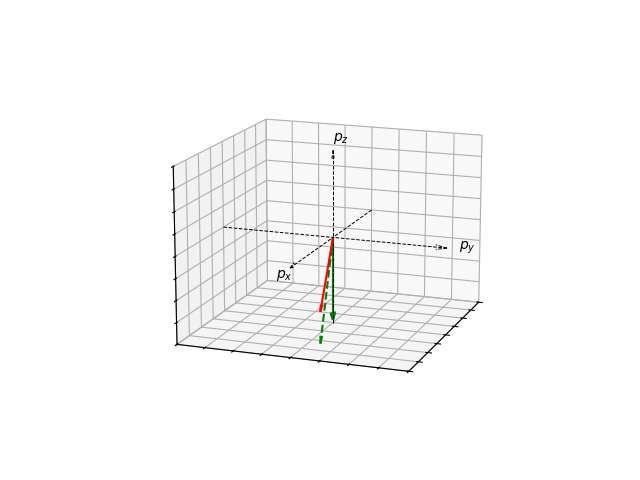

In [211]:
plt.close("all")

# E, px, py, pz
lv_pip = np.array([0.7037460788850690, 0.0138229757298888, 0.5010979958640546, 0.0158520377273281])
lv_pim = np.array([0.7977278889391801, 0.2234089946365893, 0.5333302071904471, 0.2414541688934450])
lv_Kp = np.array([1.3818453429508930, -0.6326102265449011, -1.1562201638395961, 0.3911213265367482])
lv_Km = np.array([0.8029967090807248, 0.4359269130956424, 0.1217919607850945, -0.6484275331575213])

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim
p_cms = lv_cms[1:]
v_cms = p_cms / lv_cms[0]
boost_to_cms = boost(v_cms)

lv_Kp = boost_to_cms @ lv_Kp
lv_Km = boost_to_cms @ lv_Km
lv_phi = lv_Kp + lv_Km

lv_pip = boost_to_cms @ lv_pip
lv_pim = boost_to_cms @ lv_pim
lv_X2p = lv_pip + lv_phi

lv_cms = lv_Kp + lv_Km + lv_pip + lv_pim

p_pip = lv_pip[1:]
p_pim = lv_pim[1:]
p_Kp = lv_Kp[1:]
p_Km = lv_Km[1:]

p_phi = lv_phi[1:]
p_X2p = lv_X2p[1:]
print(lv_X2p)

r, phi, theta = cartesian_to_spherical(p_X2p)
p_X2p_rot = y_rot(-theta) @ z_rot(-phi) @ p_X2p
p_phi_rot = y_rot(-theta) @ z_rot(-phi) @ p_phi
p_pip_rot = y_rot(-theta) @ z_rot(-phi) @ p_pip
p_pim_rot = y_rot(-theta) @ z_rot(-phi) @ p_pim

lv_phi_rot = np.append(lv_phi[0],p_phi_rot)
lv_X2p_rot = np.append(lv_X2p[0],p_X2p_rot)
lv_pip_rot = np.append(lv_pip[0],p_pip_rot)
lv_pim_rot = np.append(lv_pim[0],p_pim_rot)

boost_to_X2 = boost(lv_X2p_rot[1:] / lv_X2p_rot[0])
lv_phi_rot = boost_to_X2 @ lv_phi_rot
lv_X2p_rot = boost_to_X2 @ lv_X2p_rot
lv_cms = boost_to_X2 @ lv_cms
lv_pip_rot = boost_to_X2 @ lv_pip_rot
lv_pim_rot = boost_to_X2 @ lv_pim_rot

p_phi_rot = lv_phi_rot[1:]
p_X2p_rot = lv_X2p_rot[1:]
p_cms = lv_cms[1:]
p_pip_rot = lv_pip_rot[1:]
p_pim_rot = lv_pim_rot[1:]

r, phi, theta = cartesian_to_spherical(p_phi_rot)
p_phi_rot = y_rot(-theta) @ z_rot(-phi) @ p_phi_rot
p_pip_rot = y_rot(-theta) @ z_rot(-phi) @ p_pip_rot
p_pim_rot = y_rot(-theta) @ z_rot(-phi) @ p_pim_rot
p_cms_rot = y_rot(-theta) @ z_rot(-phi) @ p_cms

lv_phi_rot = np.append(lv_phi_rot[0],p_phi_rot)
lv_X2p_rot = np.append(lv_X2p_rot[0],p_X2p_rot)
lv_pip_rot = np.append(lv_pip_rot[0],p_pip_rot)
lv_pim_rot = np.append(lv_pim_rot[0],p_pim_rot)
lv_cms_rot = np.append(lv_cms[0],p_cms_rot)

boost_to_phi = boost(p_phi_rot / lv_phi_rot[0])
lv_phi_rot = boost_to_phi @ lv_phi_rot
lv_X2p_rot = boost_to_phi @ lv_X2p_rot
lv_cms_rot = boost_to_phi @ lv_cms
lv_pip_rot = boost_to_phi @ lv_pip_rot
lv_pim_rot = boost_to_phi @ lv_pim_rot

p_phi_rot = lv_phi_rot[1:]
p_X2p_rot = lv_X2p_rot[1:]
p_cms = lv_cms_rot[1:]
p_pip_rot = lv_pip_rot[1:]
p_pim_rot = lv_pim_rot[1:]


# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)


ax.quiver(0,0,0,*p_pip_rot, arrow_length_ratio=0.1, color='g',ls="--")
ax.quiver(0,0,0,*p_pim_rot, arrow_length_ratio=0.1, color='g',ls="--")
ax.quiver(0,0,0,*p_X2p_rot, arrow_length_ratio=0.1, color='g',ls="-")

ax.quiver(0,0,0,*p_phi_rot, arrow_length_ratio=0.1, color='b',ls="-")

ax.quiver(0,0,0,*p_cms_rot, arrow_length_ratio=0.1, color='r',ls="-")

# Draw axes through the origin
origin = np.zeros(3)
ax.quiver(*origin,*e_x,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_y,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_z,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_x,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_y,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_z,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.text(0, 0, 1.1, "$p_z$",)
ax.text(0, 1.1, 0, "$p_y$",)
ax.text(1.3, 0, 0, "$p_x$",)
ax.view_init(elev=15, azim=20)
ax.tick_params(which="both",labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Show the plot
plt.show()

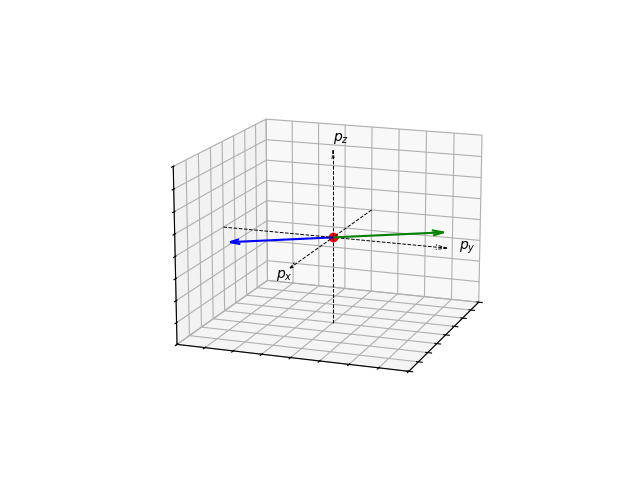

In [182]:
plt.close("all")

# E, px, py, pz
lv_pip = np.array([0.7037460788850690, 0.0138229757298888, 0.5010979958640546, 0.0158520377273281])
lv_pim = np.array([0.7977278889391801, 0.2234089946365893, 0.5333302071904471, 0.2414541688934450])
lv_Kp = np.array([1.3818453429508930, -0.6326102265449011, -1.1562201638395961, 0.3911213265367482])
lv_Km = np.array([0.8029967090807248, 0.4359269130956424, 0.1217919607850945, -0.6484275331575213])
lv_phi = lv_Kp + lv_Km

lv_cms = lv_phi + lv_pip + lv_pim
p_cms = lv_cms[1:]
v_cms = p_cms / lv_cms[0]
boost_to_cms = boost(v_cms)

lv_Kp = boost_to_cms @ lv_Kp
lv_Km = boost_to_cms @ lv_Km
lv_phi = lv_Kp + lv_Km

lv_pip = boost_to_cms @ lv_pip
lv_pim = boost_to_cms @ lv_pim
lv_X1 = lv_pip + lv_pim

p_pip = lv_pip[1:]
p_pim = lv_pim[1:]
p_Kp = lv_Kp[1:]
p_Km = lv_Km[1:]

p_phi = lv_phi[1:]
p_X1 = lv_X1[1:]

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

ax.plot3D(0,0,0, marker='o', color='r')

# ax.quiver(0,0,0,*p_pip, arrow_length_ratio=0.1, color='g',ls="-")
# ax.quiver(0,0,0,*p_pim, arrow_length_ratio=0.1, color='g',ls="-")
ax.quiver(0,0,0,*p_X1, arrow_length_ratio=0.1, color='g',ls="-")

# ax.quiver(0,0,0,*p_Kp, arrow_length_ratio=0.1, color='b',ls="--")
# ax.quiver(0,0,0,*p_Km, arrow_length_ratio=0.1, color='b',ls="--")
ax.quiver(0,0,0,*p_phi, arrow_length_ratio=0.1, color='b',ls="-")

# Draw axes through the origin
origin = np.zeros(3)
ax.quiver(*origin,*e_x,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_y,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_z,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_x,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_y,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_z,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.text(0, 0, 1.1, "$p_z$",)
ax.text(0, 1.1, 0, "$p_y$",)
ax.text(1.3, 0, 0, "$p_x$",)
ax.view_init(elev=15, azim=20)
ax.tick_params(which="both",labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Show the plot
plt.show()

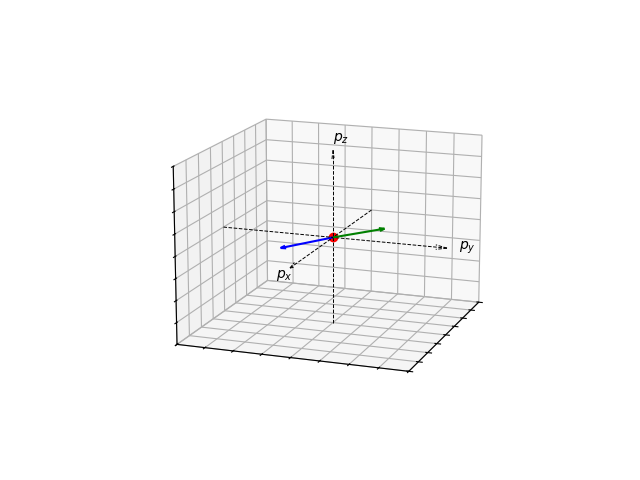

In [107]:
plt.close("all")

# E, px, py, pz
lv_pip = np.array([0.7037460788850690, 0.0138229757298888, 0.5010979958640546, 0.0158520377273281])
lv_pim = np.array([0.7977278889391801, 0.2234089946365893, 0.5333302071904471, 0.2414541688934450])
lv_Kp = np.array([1.3818453429508930, -0.6326102265449011, -1.1562201638395961, 0.3911213265367482])
lv_Km = np.array([0.8029967090807248, 0.4359269130956424, 0.1217919607850945, -0.6484275331575213])
lv_phi = lv_Kp + lv_Km

lv_cms = lv_phi + lv_pip + lv_pim
p_cms = lv_cms[1:]
m_cms = np.sqrt(lv_cms[0]**2 - np.dot(p_cms,p_cms))
v_cms = p_cms / np.sqrt(np.dot(p_cms,p_cms) + m_cms**2)
boost_to_cms = boost(-v_cms)

lv_Kp = boost_to_cms @ lv_Kp
lv_Km = boost_to_cms @ lv_Km
lv_phi = lv_Kp + lv_Km

lv_pip = boost_to_cms @ lv_pip
lv_pim = boost_to_cms @ lv_pim
lv_X1 = lv_pip + lv_pim
lv_X2p  = lv_Kp + lv_Km + lv_pip

p_pip = lv_pip[1:]
p_pim = lv_pim[1:]
p_Kp = lv_Kp[1:]
p_Km = lv_Km[1:]

p_phi = lv_phi[1:]
p_X1 = lv_X1[1:]
p_X2p = lv_X2p[1:]

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

ax.plot3D(0,0,0, marker='o', color='r')

# ax.quiver(0,0,0,*p_pip, arrow_length_ratio=0.1, color='g',ls="-")
ax.quiver(0,0,0,*p_pim, arrow_length_ratio=0.1, color='g',ls="-")
ax.quiver(0,0,0,*p_X2p, arrow_length_ratio=0.1, color='b',ls="-")

# ax.quiver(0,0,0,*p_Kp, arrow_length_ratio=0.1, color='b',ls="--")
# ax.quiver(0,0,0,*p_Km, arrow_length_ratio=0.1, color='b',ls="--")
# ax.quiver(0,0,0,*p_phi, arrow_length_ratio=0.1, color='b',ls="-")

# Draw axes through the origin
origin = np.zeros(3)
ax.quiver(*origin,*e_x,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_y,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_z,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_x,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_y,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_z,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.text(0, 0, 1.1, "$p_z$",)
ax.text(0, 1.1, 0, "$p_y$",)
ax.text(1.3, 0, 0, "$p_x$",)
ax.view_init(elev=15, azim=20)
ax.tick_params(which="both",labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Show the plot
plt.show()

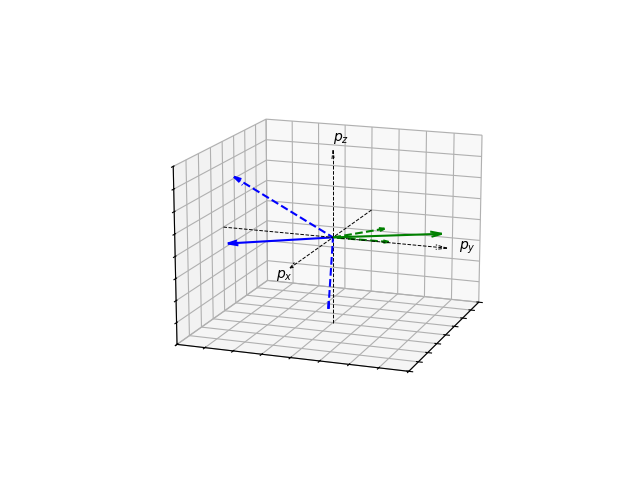

In [16]:
plt.close("all")



# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

# Plot the vector
ax.quiver(0,0,0,*p_pip, arrow_length_ratio=0.1, color='g',ls="--")
ax.quiver(0,0,0,*p_pim, arrow_length_ratio=0.1, color='g',ls="--")
ax.quiver(0,0,0,*p_X1, arrow_length_ratio=0.1, color='g',ls="-")

ax.quiver(0,0,0,*p_Kp, arrow_length_ratio=0.1, color='b',ls="--")
ax.quiver(0,0,0,*p_Km, arrow_length_ratio=0.1, color='b',ls="--")
ax.quiver(0,0,0,*p_phi, arrow_length_ratio=0.1, color='b',ls="-")

# Draw axes through the origin
origin = np.zeros(3)
ax.quiver(*origin,*e_x,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_y,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*e_z,arrow_length_ratio=0.1, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_x,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_y,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.quiver(*origin,*-e_z,arrow_length_ratio=0, color='k', ls='--', lw=0.7)
ax.text(0, 0, 1.1, "$p_z$",)
ax.text(0, 1.1, 0, "$p_y$",)
ax.text(1.3, 0, 0, "$p_x$",)
ax.view_init(elev=15, azim=20)
ax.tick_params(which="both",labelbottom=False, labelleft=False, labelright=False, labeltop=False)
# Show the plot
plt.show()